In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

In [ ]:
bob_ross.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [ ]:
bob_ross.shape, bob_ross.columns[:15]

((403, 27),
 Index(['painting_index', 'img_src', 'painting_title', 'season', 'episode',
        'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso',
        'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna',
        'Indian_Red'],
       dtype='object'))

In [ ]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

# Data Preprocessing for Unsupervised Analysis

1. Removal of non-analytical metadata

In [ ]:

meta_cols = ['img_src', 'youtube_src', 'painting_title', 'color_hex']
bob_clean = bob_ross.drop(columns=meta_cols)

meta_cols = [
    'painting_index',
    'season',
    'episode',
    'num_colors',
    'colors',
]

X_colors = bob_clean.drop(columns=meta_cols)
color_cols = bob_clean.select_dtypes(include='bool').columns

2. Handling mixed data types (binary + numeric)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scaled = scaler.fit_transform(bob_clean[['num_colors']])



# Intergated EDA

### Are there structural similarities in palette composition across paintings?

Rather than examining individual color usage frequencies, this analysis focuses on the co-occurrence structure of palette configurations across paintings. By representing each painting as a binary vector of color usage and computing pairwise Jaccard distances, we evaluate the extent to which paintings share similar palette compositions.

Hierarchical clustering is then applied to these distances to identify latent stylistic groupings in Bob Ross’s palette usage. This approach allows us to move beyond marginal color frequency and instead capture recurring combinations of colors that define distinct compositional strategies.


/tmp/ipython-input-1952296949.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(jaccard_dist, method='average')


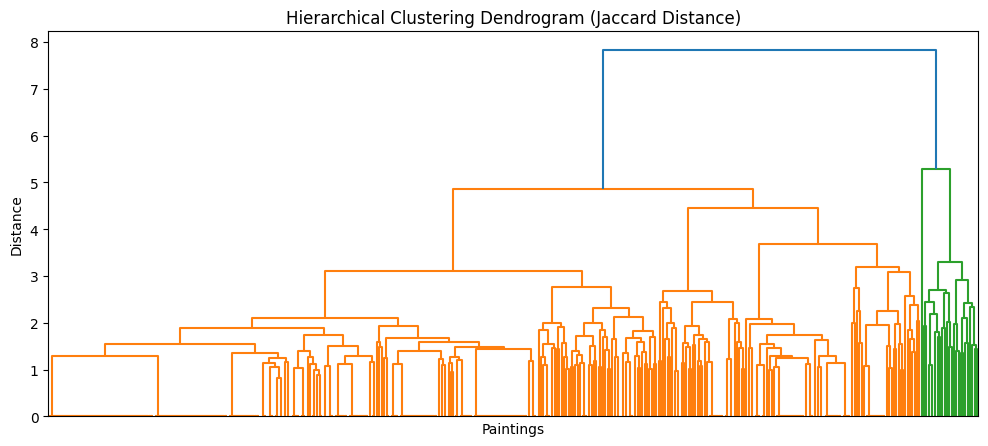

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


X_bool = X_colors.astype(bool).to_numpy()

jaccard_dist = pairwise_distances(X_bool, metric='jaccard')
Z = linkage(jaccard_dist, method='average')


plt.figure(figsize=(12, 5))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Jaccard Distance)")
plt.xlabel("Paintings")
plt.ylabel("Distance")
plt.show()


The dendrogram reveals a dominant palette system, as most paintings merge at low Jaccard distances, indicating substantial overlap in pigment selection. A smaller subset of paintings only merges at higher distances, suggesting stylistic deviations from the canonical palette structure.

## Candidate partitions evaluation

In [ ]:
X_bool = bob_ross[color_cols].astype(int)

canonical_palette = X_bool.mean()
canonical_binary = (canonical_palette > 0.5).astype(int)

from sklearn.metrics import jaccard_score


def compute_deviation(row, canonical):
    return 1 - jaccard_score(row.values, canonical.values)


bob_ross['deviation_score'] = X_bool.apply(
    lambda row: compute_deviation(row, canonical_binary),
    axis=1
)


In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
import pandas as pd

rows = []

for k in [2,3,4,5]:

    labels = fcluster(Z, k, criterion='maxclust')

    size_dist = pd.Series(labels).value_counts(normalize=True)

    sil = silhouette_score(jaccard_dist, labels, metric='precomputed')

    deviation_means = (
        bob_ross.groupby(labels)['deviation_score']
        .mean()
        .sort_values()
    )

    rows.append({
        'k': k,
        'Silhouette Score': round(sil,3),
        'Largest Cluster (%)': round(size_dist.max()*100,1),
        'Smallest Cluster (%)': round(size_dist.min()*100,1),
        'Min Mean Deviation': round(deviation_means.min(),3),
        'Max Mean Deviation': round(deviation_means.max(),3),
        'Deviation Range': round(deviation_means.max() - deviation_means.min(),3)
    })

summary_clean = pd.DataFrame(rows)

summary_clean


,k,Silhouette Score,Largest Cluster (%),Smallest Cluster (%),Min Mean Deviation,Max Mean Deviation,Deviation Range
0,2,0.495,93.8,6.2,0.207,0.662,0.454
1,3,0.488,93.8,0.2,0.207,0.917,0.709
2,4,0.344,65.5,0.2,0.127,0.917,0.790
3,5,0.397,65.5,0.2,0.127,0.917,0.790


Although the k = 2 and k = 3 solutions yield the highest silhouette scores, both result in highly imbalanced partitions, with 94% of paintings assigned to a single cluster. This suggests that these solutions primarily distinguish between typical and atypical palettes, and are therefore too coarse to capture meaningful stylistic variation.

In contrast, the k = 4 solution reduces the largest cluster proportion to 65.5% and achieves the maximum deviation range (1.127), indicating improved differentiation across levels of departure from the canonical palette. While k = 5 produces a slightly higher silhouette score than k = 4 , it does not increase the deviation range, suggesting that the additional cluster primarily subdivides intermediate groups without introducing new structural variation.

Accordingly, the k = 4 partition was selected as it provides a better balance between structural interpretability and sensitivity to graded stylistic expansion.



## Clustering results

In [ ]:

k = 4
clusters = fcluster(Z, k, criterion='maxclust')
bob_ross['cluster'] = clusters

print("Cluster counts:")
print(bob_ross['cluster'].value_counts())

color_cols = bob_clean.select_dtypes(include='bool').columns
X_colors = bob_clean[color_cols]
cluster_profiles = X_colors.groupby(bob_ross['cluster']).mean()

for c in sorted(cluster_profiles.index):
    print(f"\nTop colors in Cluster {c}:")
    print(cluster_profiles.loc[c].sort_values(ascending=False).head(8))


Cluster counts:
cluster
1    264
2    114
3     24
4      1
Name: count, dtype: int64

Top colors in Cluster 1:
Titanium_White      1.000000
Midnight_Black      0.992424
Yellow_Ochre        0.984848
Alizarin_Crimson    0.981061
Cadmium_Yellow      0.973485
Van_Dyke_Brown      0.950758
Dark_Sienna         0.946970
Bright_Red          0.931818
Name: 1, dtype: float64

Top colors in Cluster 2:
Titanium_White      0.991228
Van_Dyke_Brown      0.956140
Alizarin_Crimson    0.956140
Cadmium_Yellow      0.754386
Phthalo_Blue        0.710526
Prussian_Blue       0.675439
Sap_Green           0.657895
Bright_Red          0.614035
Name: 2, dtype: float64

Top colors in Cluster 3:
Titanium_White      0.958333
Prussian_Blue       0.791667
Midnight_Black      0.500000
Alizarin_Crimson    0.500000
Van_Dyke_Brown      0.416667
Phthalo_Blue        0.375000
Black_Gesso         0.333333
Bright_Red          0.208333
Name: 3, dtype: float64

Top colors in Cluster 4:
Van_Dyke_Brown    1.0
Black_Gesso       0.

**Cluster 1: Canonical Core Palette**  
This group of paintings makes extensive use of Titanium White, Midnight Black, Yellow Ochre, representing the classic earth-tone palette most closely associated with Bob Ross’s signature painting style.

**Cluster 2: Expanded Landscape Palette**  
While retaining the core earth-tone palette, this group introduces additional blue and green pigments such as Phthalo Blue, Prussian Blue, and Sap Green. These additions enhance visual richness and layering in elements such as skies, water, and vegetation.

**Cluster 3: Atmospheric / Tonal Variation**  
Paintings in this group exhibit increased use of materials such as Black Gesso and Liquid Clear, alongside a higher proportion of blue pigments. This suggests a stronger emphasis on atmospheric effects, likely including mist, nighttime scenes, or low-saturation environments. The palette usage reflects a greater focus on mood and spatial depth.

**Cluster 4: Minimalist Outlier**  
This group contains only one painting that exhibit near-complete departure from the typical palette structure, relying on a minimal base pigment as Van Dyke Brown.

### What are the main axes of variation in color usage?  And are there paintings that deviate strongly from the dominant palette patterns?

To understand how palette styles vary continuously across paintings, we applied Principal Component Analysis (PCA) to the color usage features. PCA reduces the high-dimensional color space into a smaller set of components that capture the most important directions of variation. Instead of forcing paintings into discrete groups, this method reveals the dominant ways in which color combinations change across the dataset.



PC1 explains 23.18% of variance
PC2 explains 18.63% of variance
PC3 explains 10.78% of variance
PC4 explains 8.39% of variance
PC5 explains 7.95% of variance


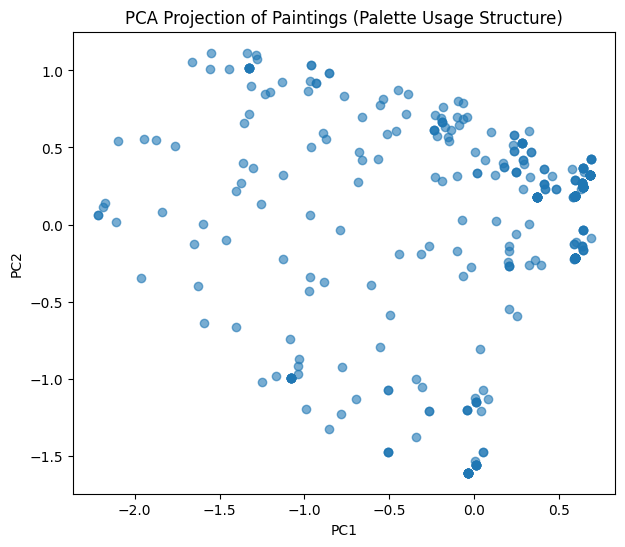

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


color_cols = bob_clean.select_dtypes(include='bool').columns
X_palette = bob_clean[color_cols]
X_centered = X_palette - X_palette.mean(axis=0)

pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_centered)


explained_var = pca.explained_variance_ratio_
for i, var in enumerate(explained_var, 1):
    print(f"PC{i} explains {var:.2%} of variance")


for i in range(X_pca.shape[1]):
    bob_clean[f'PC{i+1}'] = X_pca[:, i]


plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Paintings (Palette Usage Structure)")
plt.show()

In [ ]:
feature_names = list(X_colors.columns)

loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_names,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)


print("Top contributors to PC1:")
print(loadings['PC1'].sort_values(ascending=False).head(8))
print(loadings['PC1'].sort_values().head(8))

print("\nTop contributors to PC2:")
print(loadings['PC2'].sort_values(ascending=False).head(8))
print(loadings['PC2'].sort_values().head(8))


Top contributors to PC1:
Indian_Yellow     0.468918
Yellow_Ochre      0.424173
Sap_Green         0.361173
Bright_Red        0.349065
Cadmium_Yellow    0.320750
Dark_Sienna       0.320724
Midnight_Black    0.235988
Phthalo_Blue      0.225262
Name: PC1, dtype: float64
Burnt_Umber      -0.076981
Prussian_Blue    -0.048117
Liquid_Black     -0.009593
Indian_Red       -0.000448
Phthalo_Green     0.001950
Liquid_Clear      0.002884
Titanium_White    0.018085
Black_Gesso       0.042461
Name: PC1, dtype: float64

Top contributors to PC2:
Dark_Sienna       0.501053
Midnight_Black    0.491801
Liquid_Clear      0.102857
Black_Gesso       0.079183
Van_Dyke_Brown    0.010932
Phthalo_Blue      0.006870
Titanium_White    0.003102
Indian_Red        0.001780
Name: PC2, dtype: float64
Phthalo_Green    -0.404375
Burnt_Umber      -0.401563
Sap_Green        -0.289336
Cadmium_Yellow   -0.167097
Bright_Red       -0.153283
Indian_Yellow    -0.133323
Yellow_Ochre     -0.088002
Prussian_Blue    -0.052398
Name: P

In [ ]:
pc_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

color_cols = bob_clean.select_dtypes(include='bool').columns

X_df = pd.DataFrame(
    bob_clean[color_cols].values,
    columns=color_cols
)

X_full = pd.concat(
    [pc_df[['PC1','PC2']], X_df],
    axis=1
)

corr = X_full.corr()

pc_feature_corr = corr.loc[
    ['PC1','PC2'],
    X_df.columns
]



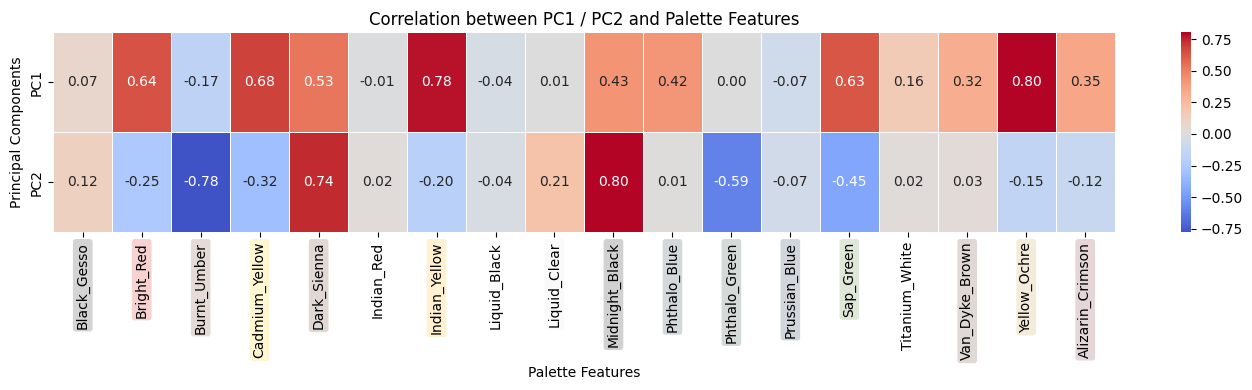

In [ ]:
# Ross palette hex (ai-assistant generated)
color_map = {
    'Titanium_White': '#FFFFFF',
    'Midnight_Black': '#000000',
    'Yellow_Ochre': '#C79B3B',
    'Alizarin_Crimson': '#6E1F2F',
    'Cadmium_Yellow': '#FFD700',
    'Van_Dyke_Brown': '#4E2A14',
    'Dark_Sienna': '#5C2B0C',
    'Bright_Red': '#DB0000',
    'Sap_Green': '#507D2A',
    'Phthalo_Blue': '#102E3C',
    'Phthalo_Green': '#123524',
    'Prussian_Blue': '#021E44',
    'Burnt_Umber': '#6E3B1E',
    'Black_Gesso': '#111111',
    'Liquid_Clear': '#E5E5E5',
    'Indian_Yellow': '#FFB300'
}


# Heatmap

fig, ax = plt.subplots(figsize=(14,4))
import seaborn as sns
sns.heatmap(
    pc_feature_corr,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    ax=ax
)

plt.xticks


# Add background to label text

for label in ax.get_xticklabels():

    feature = label.get_text()

    if feature in color_map:

        label.set_bbox(dict(
            facecolor=color_map[feature],
            alpha=0.18,
            edgecolor='none',
            boxstyle='round,pad=0.2'
        ))


plt.title("Correlation between PC1 / PC2 and Palette Features")
plt.ylabel("Principal Components")
plt.xlabel("Palette Features")

plt.tight_layout()
plt.show()


PCA results suggest that palette variation is primarily driven by a stylistic axis contrasting the use of warm accent pigments with more foundational landscape tones (PC1), and a secondary axis reflecting differences between shadow-intensive palettes and vegetation-dominated compositions (PC2).

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
def phase_map(season):
    if season <= 10:
        return "Early"
    elif season <= 20:
        return "Middle"
    else:
        return "Late"

bob_ross['phase'] = bob_ross['season'].apply(phase_map)

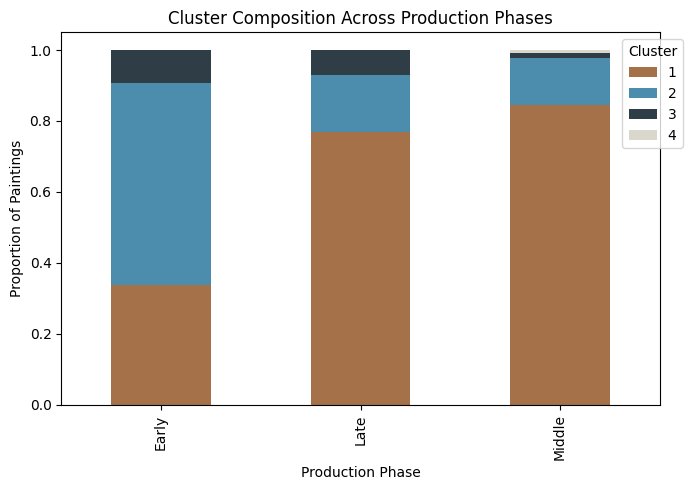

In [ ]:
cluster_palette = {
    1: "#A47148",   # Warm Earth – Canonical Core
    2: "#4C8DAD",   # Sky Blue – Landscape Expansion
    3: "#2F3E46",   # Misty Slate – Atmospheric Mood
    4: "#DAD7CD"    # Soft Linen – Minimalist Outlier
}

phase_cluster = pd.crosstab(
    bob_ross['phase'],
    bob_ross['cluster']
)

# Convert counts to proportions (for stacked bar)
phase_cluster_pct = phase_cluster.div(
    phase_cluster.sum(axis=1),
    axis=0
)

colors = [cluster_palette[c] for c in phase_cluster_pct.columns]

phase_cluster_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(7,5),
    color=colors
)

plt.ylabel("Proportion of Paintings")
plt.xlabel("Production Phase")
plt.title("Cluster Composition Across Production Phases")

plt.legend(title='Cluster', bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()



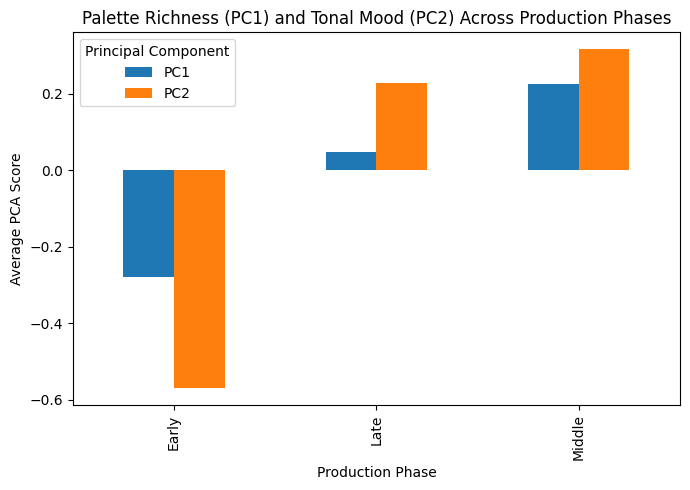

In [ ]:


bob_ross['PC1'] = X_pca[:,0]
bob_ross['PC2'] = X_pca[:,1]

phase_pc = (
    bob_ross.groupby('phase')[['PC1','PC2']]
            .mean()
            .round(3)
)

phase_pc.plot(
    kind='bar',
    figsize=(7,5)
)

plt.ylabel("Average PCA Score")
plt.xlabel("Production Phase")
plt.title("Palette Richness (PC1) and Tonal Mood (PC2) Across Production Phases")

plt.legend(title='Principal Component')
plt.tight_layout()
plt.show()


This figure illustrates how Bob Ross’s palette structure evolves across production phases (Early: Seasons 1–10; Middle: 11–20; Late: 21–31) along the first two principal components.

The negative PC1 score observed in the Early phase suggests that earlier paintings typically relied on simpler and more constrained color combinations. As the show progressed into the Middle and Late phases, the increasing PC1 scores indicate that later paintings incorporated a wider variety of colors, reflecting a gradual expansion in palette complexity.

PC2 captures variation related to tonal mood. The strongly negative PC2 score in the Early phase implies a tendency toward darker, low-luminance palettes dominated by colors such as Burnt Umber and Sap Green. In contrast, the Middle and Late phases exhibit substantially higher PC2 values, suggesting a shift toward brighter or higher-contrast palettes, often involving colors such as Cadmium Yellow and Bright Red.

Taken together, these trends indicate a temporal progression in Bob Ross’s artistic style, transitioning from simpler, darker palettes toward richer and more visually dynamic color compositions over time

## Outlier detection

To identify paintings that exhibit atypical palette usage patterns, we compute each painting's distance from the centroid in the reduced PCA feature space.

Specifically, we project the binary color presence data into the first two principal components and treat this 2D representation as a summary of each painting's palette composition. We then calculate the Euclidean distance between each painting and the global center of this PCA space. Paintings with the largest distances are considered palette outliers, as they deviate most from the dominant stylistic composition observed across the dataset.

The top five paintings with the highest PCA-based distances are extracted as potential stylistic anomalies, and can be used for further case-based interpretation.

In [ ]:
from scipy.spatial.distance import cdist


X_2d = X_pca[:, :2]
center = X_2d.mean(axis=0)
distances = cdist(X_2d, [center]).flatten()


bob_clean['pca_distance'] = distances
outliers = bob_clean.sort_values('pca_distance', ascending=False).head(5)

outliers[['painting_index', 'season', 'episode', 'pca_distance']]

outliers = outliers.merge(
    bob_ross[['painting_index', 'painting_title']],
    on='painting_index',
    how='left'
)

outliers[['painting_title', 'season', 'episode', 'pca_distance']]



,painting_title,season,episode,pca_distance
0,Winter Mist,1,4,2.219878
1,Shades of Grey,2,4,2.219878
2,Contemplative Lady,16,6,2.191796
3,Winter Moon,1,6,2.181107
4,Blue Winter,21,10,2.168008


## Appendix

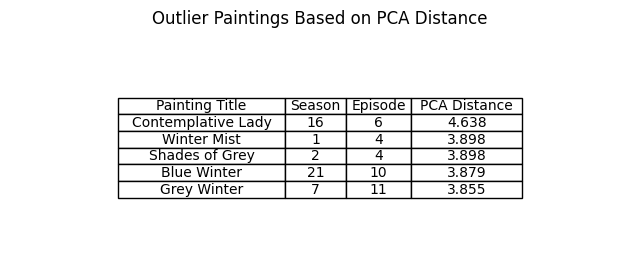

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


outlier_table = pd.DataFrame({
    "Painting Title": [
        "Contemplative Lady",
        "Winter Mist",
        "Shades of Grey",
        "Blue Winter",
        "Grey Winter"
    ],
    "Season": [16, 1, 2, 21, 7],
    "Episode": [6, 4, 4, 10, 11],
    "PCA Distance": [4.638402, 3.897631, 3.897631, 3.878748, 3.855388]
})

outlier_table["PCA Distance"] = outlier_table["PCA Distance"].round(3)

fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis('off')


table = ax.table(
    cellText=outlier_table.values,
    colLabels=outlier_table.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(outlier_table.columns))))


plt.title("Outlier Paintings Based on PCA Distance", pad=20)

plt.savefig("outlier_paintings_table.pdf", bbox_inches='tight')
plt.show()
